## Problem Statement

We are working on Income prediction problem associated with the Adult Income Census dataset.The goal is to accurately predict whether or not a person is making more or less than $50,000 a year, While working through this problem statement.

## About the Dataset

- __Age:__ Describes the age of individuals. Continuous.
- __Workclass:__ Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- __fnlwgt:__ Continuous.
- __education:__ Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- __education-num:__ Number of years spent in education. Continuous.
- __marital-status:__ Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- __occupation:__ Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- __relationship:__ Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- __race:__ White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- __sex:__ Female, Male.
- __capital-gain:__ Continuous.
- __capital-loss:__ Continuous.
- __hours-per-week:__ Continuous.
- __native-country:__ United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- __salary:__ >50K,<=50K

__Importing Important Libraries__

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
plt.style.use('fivethirtyeight')
pd.pandas.set_option("display.max_columns",None)

__Loading Data__

In [2]:
data = pd.read_csv("adult.csv")

__Understanding The Data__ 

In [3]:
data.shape

(32561, 15)

In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


__Modifying Column Labels__

In [7]:
data.columns = data.columns.str.replace(".", "_")
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [8]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


__Checking null & duplicate Values__

In [9]:
# Check null values in dataset
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
# check duplicate value in dataset
data.duplicated().sum()

24

In [11]:
# drop duplicate value from dataset
data.drop_duplicates(inplace=True)

In [12]:
#Descriptive Analysis of dataset
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


__Dropping/Replacing missing entries__

In [13]:
# saprating catigorical and numerical features
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

In [14]:
catigorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [15]:
numerical_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [16]:
# check the unique features from catigorical data
for i in catigorical_features:
    print("\n",i,data[i].unique(),"\n")
    print("\n","Seperated_Columns".center(75,"*"),"\n")


 workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked'] 


 *****************************Seperated_Columns***************************** 


 education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool'] 


 *****************************Seperated_Columns***************************** 


 marital_status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 


 *****************************Seperated_Columns***************************** 


 occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 


 *****************************Seperated_Columns***

In [17]:
# removing ? and replacing it with mode value

data.workclass.replace("?",data["workclass"].mode()[0], inplace= True)
data.occupation.replace("?",data["occupation"].mode()[0], inplace= True)
data.native_country.replace("?",data["native_country"].mode()[0], inplace= True)

__Data Visualization__

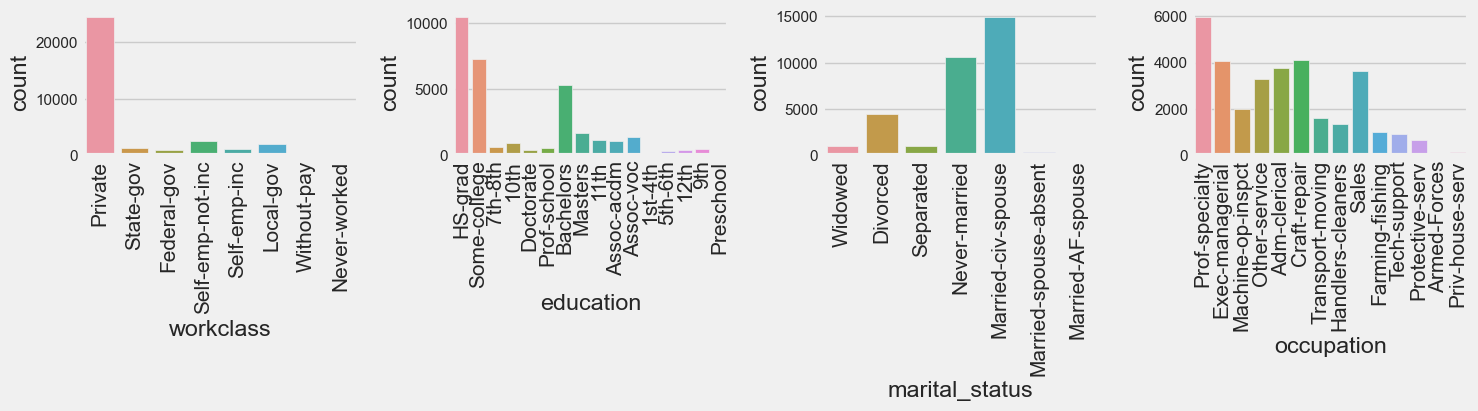

In [18]:
colmns1 = ['workclass', 'education', 'marital_status', 'occupation']

for i in range(0,len(colmns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[colmns1[i]])
    
    
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

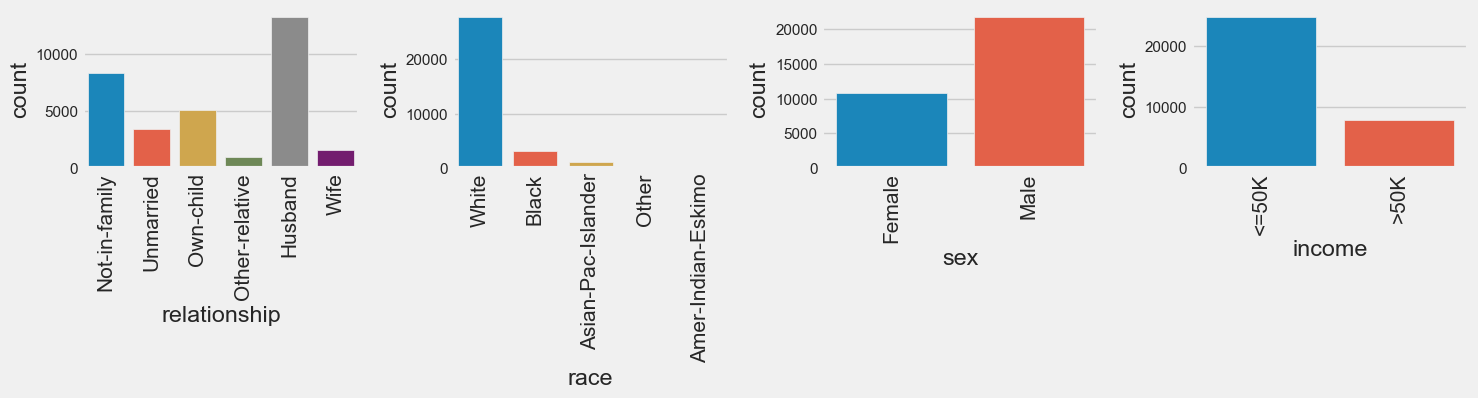

In [19]:
colmns2 = ['relationship', 'race', 'sex', 'income']

for i in range(0,len(colmns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[colmns2[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

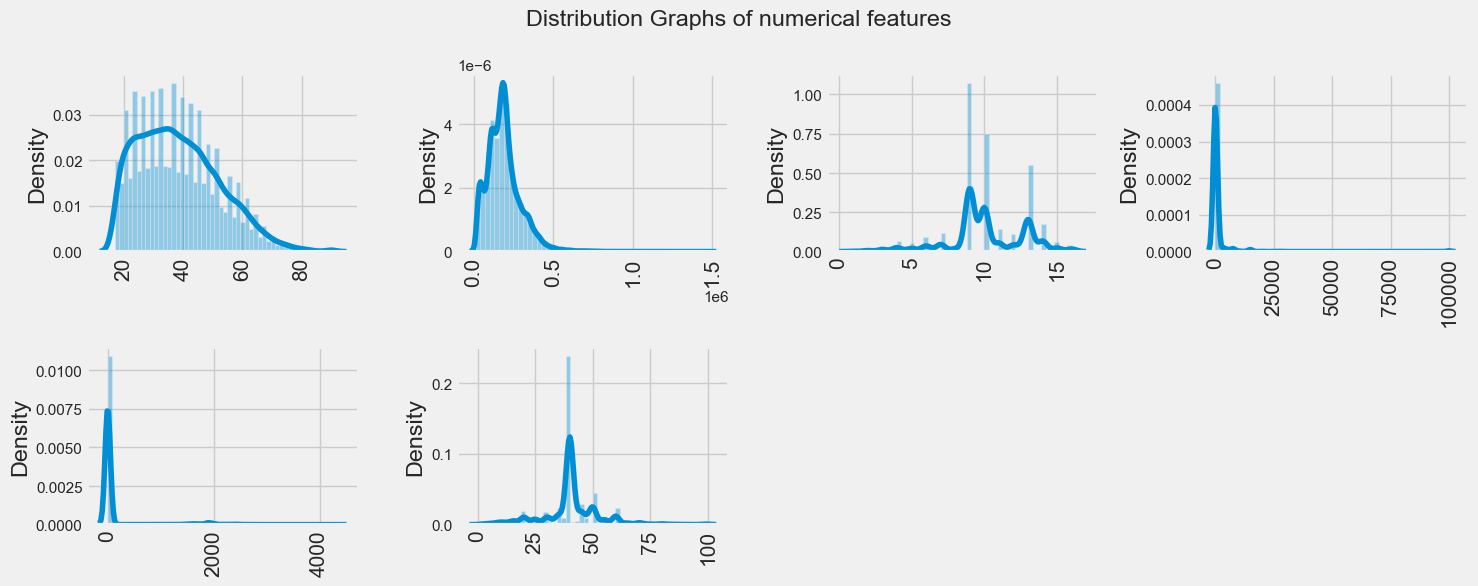

In [20]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

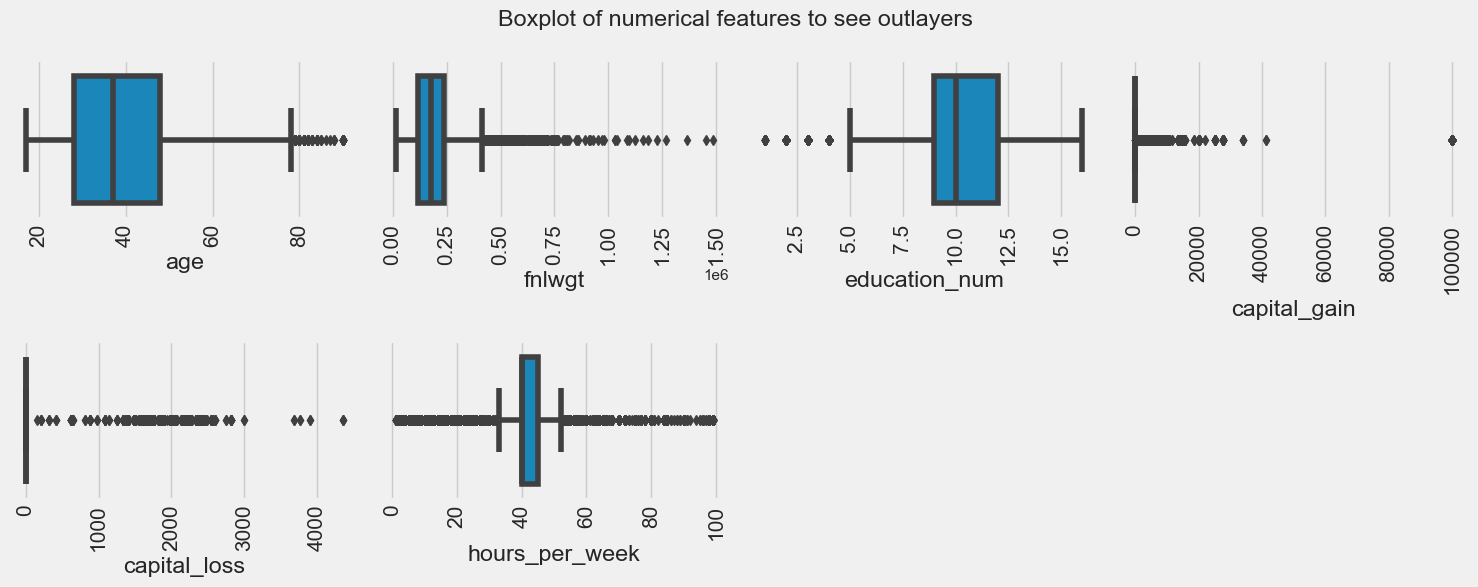

In [21]:
plt.suptitle("Boxplot of numerical features to see outlayers ")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

<AxesSubplot:xlabel='income'>

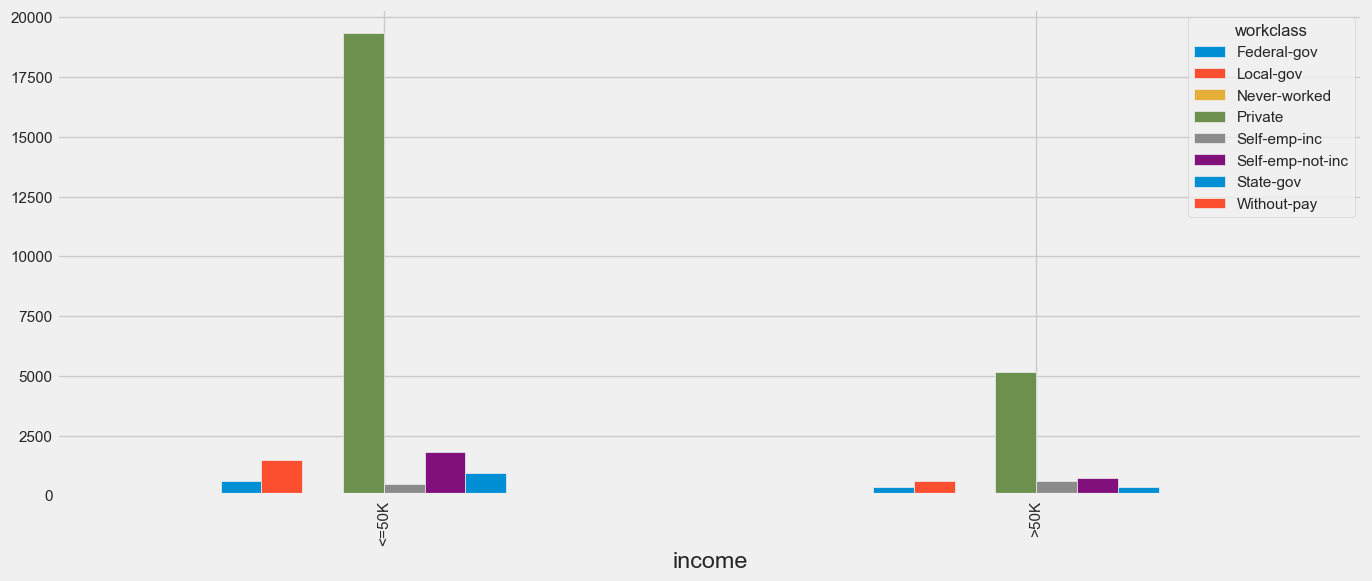

In [22]:
salary = pd.crosstab(data['income'],data['workclass'])
salary.plot(kind='bar')

<AxesSubplot:xlabel='income'>

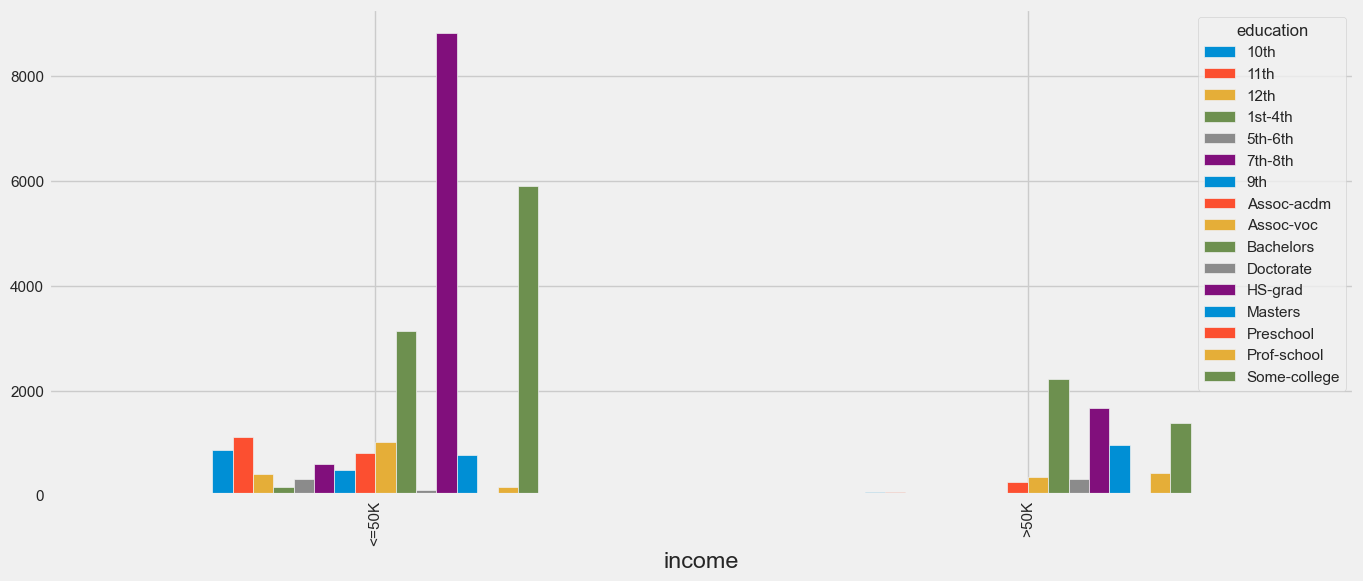

In [23]:
education = pd.crosstab(data['income'],data['education'])
education.plot(kind="bar")

<AxesSubplot:xlabel='income'>

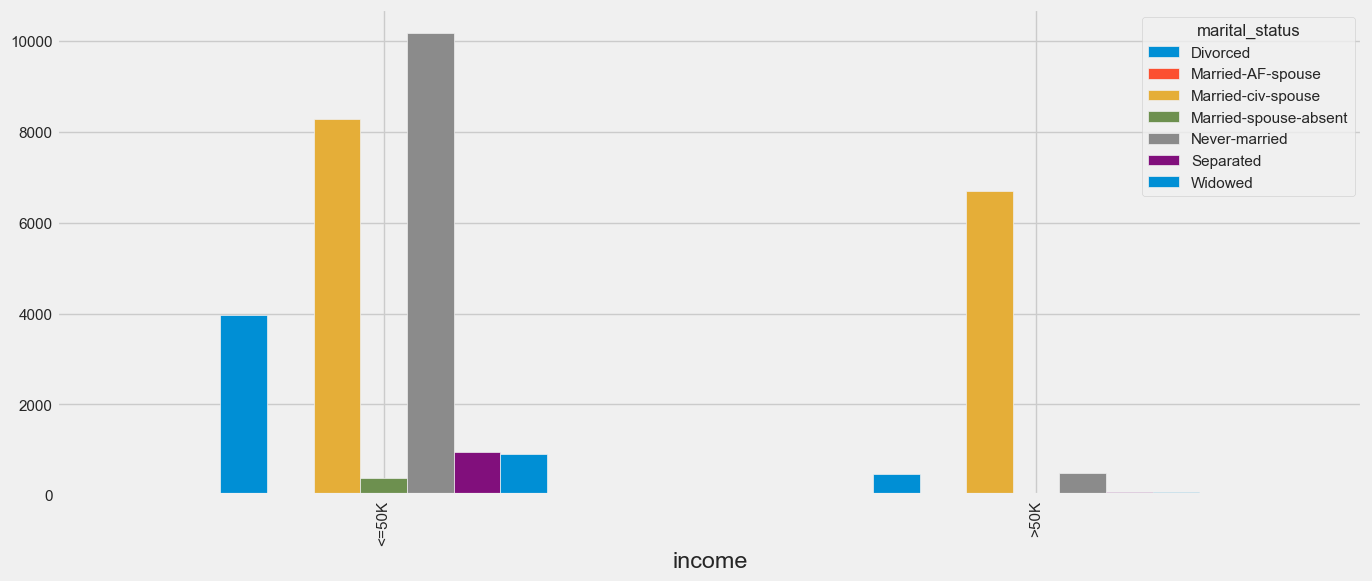

In [24]:
marital_status = pd.crosstab(data['income'],data['marital_status'])
marital_status.plot(kind="bar")

<AxesSubplot:xlabel='income'>

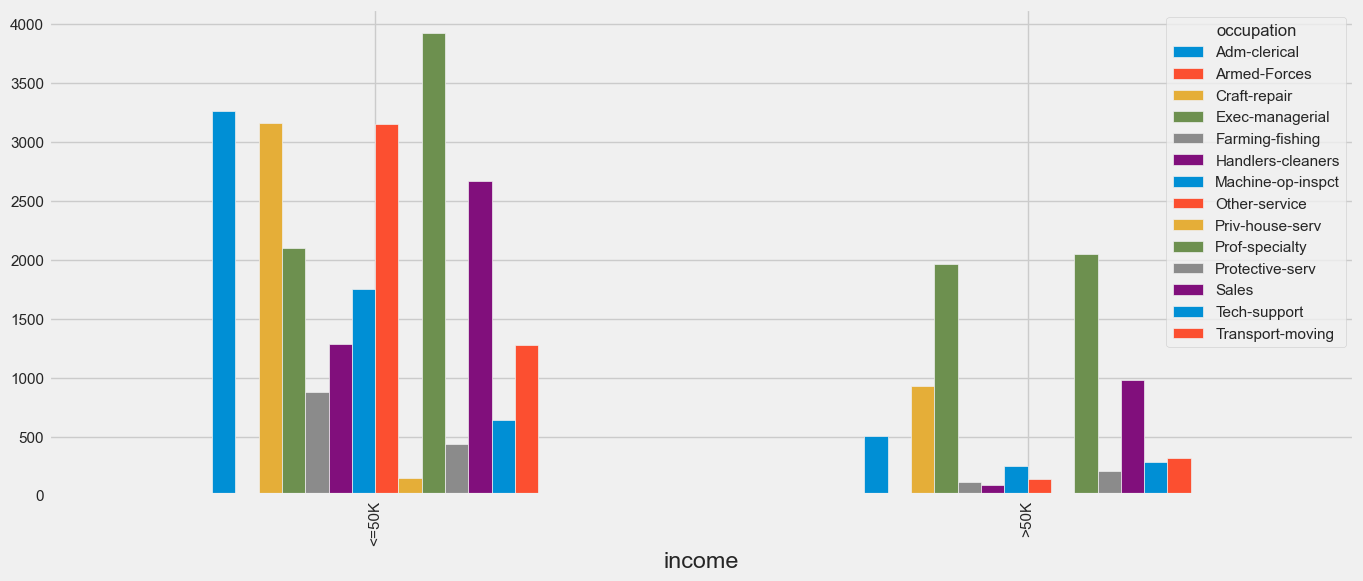

In [25]:
occupation = pd.crosstab(data['income'],data['occupation'])
occupation.plot(kind="bar")

<AxesSubplot:xlabel='income'>

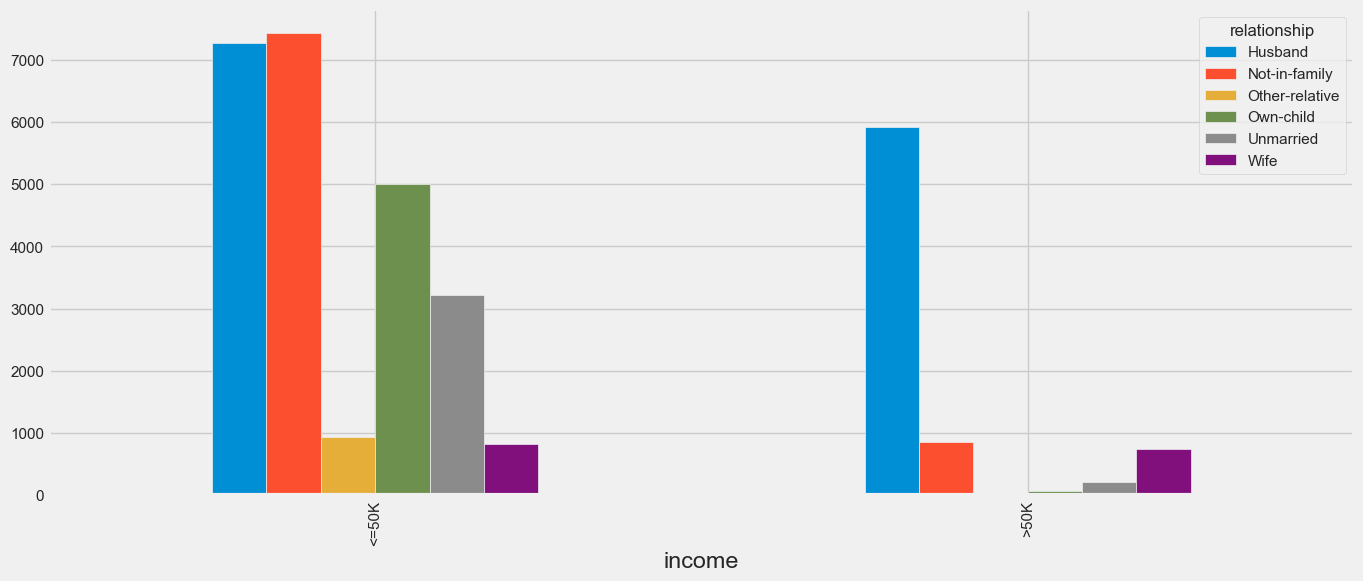

In [26]:
relationship = pd.crosstab(data['income'],data['relationship'])
relationship.plot(kind="bar")

<AxesSubplot:xlabel='income'>

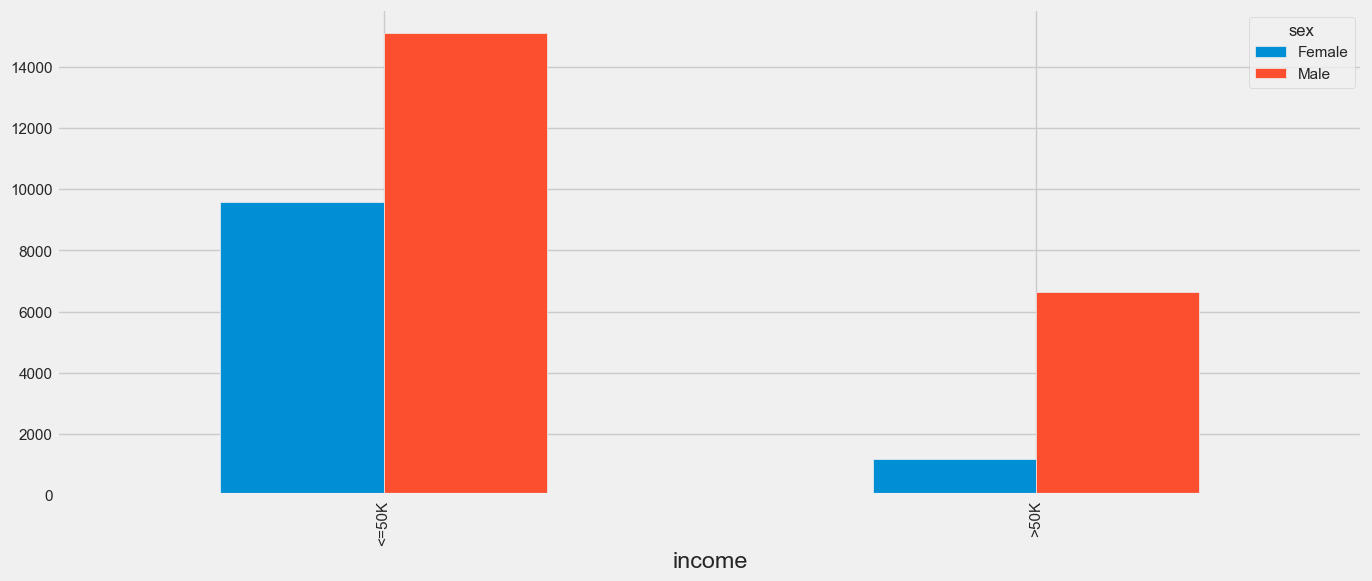

In [27]:
sex = pd.crosstab(data['income'],data['sex'])
sex.plot(kind="bar")

In [28]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features =['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']

# loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])

In [29]:
data["income"] = data["income"].map({'<=50K':0, '>50K':1})

<AxesSubplot:>

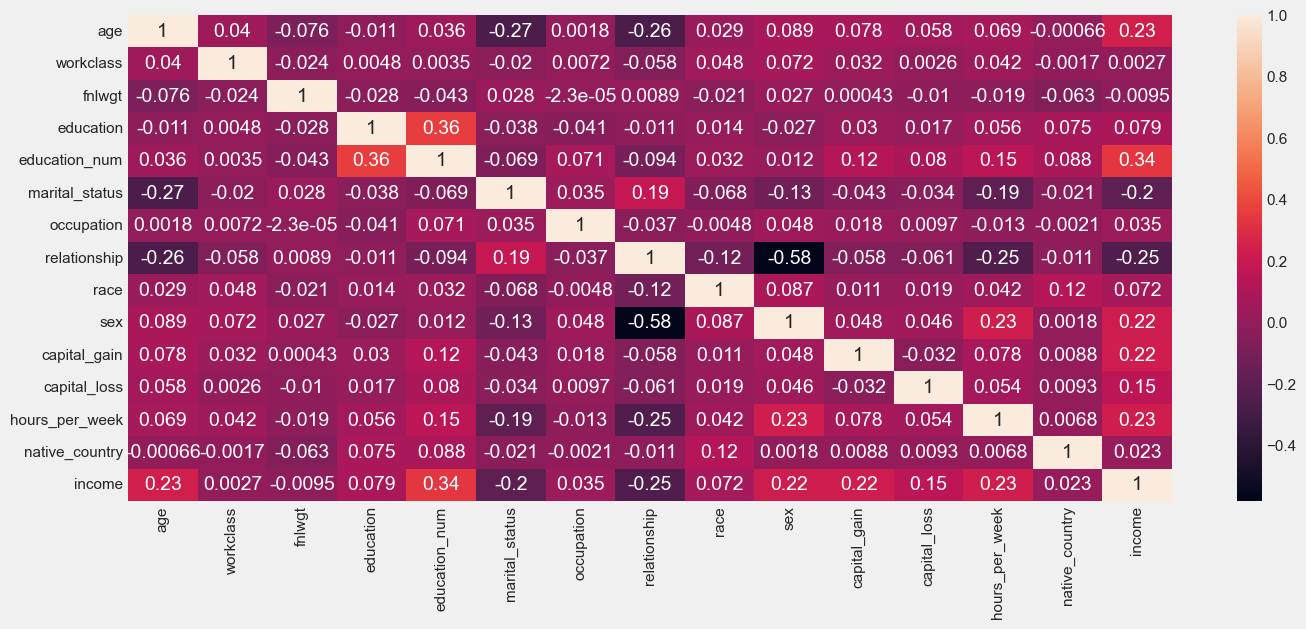

In [30]:
sns.heatmap(data.corr(),annot=True)

In [31]:
# droping education_num column because we have education ordinal encoded one
data.drop(["education_num","fnlwgt", "native_country"],axis=1,inplace=True)

In [32]:
data.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,3,11,6,9,1,4,0,0,4356,40,0
1,82,3,11,6,3,1,4,0,0,4356,18,0
2,66,3,15,6,9,4,2,0,0,4356,40,0
3,54,3,5,0,6,4,4,0,0,3900,40,0
4,41,3,15,5,9,3,4,0,0,3900,40,0


In [33]:
data.to_csv("cleandata.csv",index=False)

## Model Training

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [35]:
data.shape

(32537, 12)

In [36]:
# Saprate dependent and indipendent features
x = data.drop("income",axis=1)
y = data["income"]

In [37]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [38]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]

) # to standardize the data values into a standard format.

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

# apply transform to particular columns. 
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [39]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 11)
(6508, 11)
(26029,)
(6508,)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

In [42]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    
    precision = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    
    return confusionmetrix,precision,recall,f1score,accuracyscore

__Use Hyperparametertuning__

In [43]:
lr = LogisticRegression()

In [44]:
pram = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [45]:
grid = GridSearchCV(estimator=lr,param_grid=pram,cv=5,n_jobs=-1, verbose=3)

In [46]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [47]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [48]:
grid.score(X_train,y_train)

0.7794383187982635

In [49]:
y_prad = grid.predict(X_test)

In [50]:
accuracy_score(y_test,y_prad)

0.7811923786109404

In [51]:
dr = DecisionTreeClassifier()

In [52]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [53]:
grid_search = GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")

In [54]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [55]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'splitter': 'best'}

In [56]:
accuracy_score(y_test,y_prad)

0.7811923786109404

In [57]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      4988
           1       0.56      0.30      0.39      1520

    accuracy                           0.78      6508
   macro avg       0.69      0.61      0.63      6508
weighted avg       0.75      0.78      0.76      6508



In [58]:
rf = RandomForestClassifier()

In [59]:
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}

In [60]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [61]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [62]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 50}

In [63]:
grid_search.score(X_train,y_train)

0.811095316762073

In [64]:
y_prad = grid_search.predict(X_test)

In [65]:
accuracy_score(y_test,y_prad)

0.7951751690227412

In [66]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      4988
           1       0.54      0.87      0.66      1520

    accuracy                           0.80      6508
   macro avg       0.74      0.82      0.76      6508
weighted avg       0.85      0.80      0.81      6508

